# Hands-on

Once we know a bit about what computational notebooks are and why we should care about them, let's jump to using them! This section introduces you to using Python for manipulating tabular data. Please read through it carefully and pay attention to how ideas about manipulating data are translated into Python code that "does stuff". For this part, you can read directly from the course website, although it is recommended you follow the section interactively by running code on your own.

Once you have read through and have a bit of a sense of how things work, jump on the [Do-It-Yourself section](diy_B), which will provide you with a challenge to complete it on your own, and will allow you to put what you have already learnt to good use. Happy hacking!


(lab_A-data_munging)=
## Data munging

Real world datasets are messy. There is no way around it: datasets have "holes" (missing data), the amount of formats in which data can be stored is endless, and the best structure to share data is not always the optimum to analyze them, hence the need to [munge](http://dictionary.reference.com/browse/munge) them. As has been correctly pointed out in many outlets ([e.g.](http://www.nytimes.com/2014/08/18/technology/for-big-data-scientists-hurdle-to-insights-is-janitor-work.html?_r=0)), much of the time [spent](https://twitter.com/BigDataBorat/status/306596352991830016) in what is called (Geo-)Data Science is related not only to sophisticated modeling and insight, but has to do with much more basic and less exotic tasks such as obtaining data, processing, turning them into a shape that makes analysis possible, and exploring it to get to know their basic properties. 

For how labor intensive and relevant this aspect is, there is surprisingly very little published on patterns, techniques, and best practices for quick and efficient data cleaning, manipulation, and transformation. In this session, you will use a few real world datasets and learn how to process them into Python so they can be transformed and manipulated, if necessary, and analyzed. For this, we will introduce some of the bread and butter of data analysis and scientific computing in Python. These are fundamental tools that are constantly used in almost any task relating to data analysis.

This notebook covers the basic and the content that is expected to be learnt by every student. We use a prepared dataset that saves us much of the more intricate processing that goes beyond the introductory level the session is aimed at. As a companion to this introduction, there is an additional notebook (see link on the website page for Lab 01) that covers how the dataset used here was prepared from raw data downloaded from the internet, and includes some additional exercises you can do if you want dig deeper into the content of this lab.

In this notebook, we discuss several patterns to clean and structure data properly, including tidying, subsetting, and aggregating; and we finish with some basic visualization. An additional extension presents more advanced tricks to manipulate tabular data.

Before we get our hands data-dirty, let us import all the additional libraries we will need, so we can get that out of the way and focus on the task at hand:

In [1]:
# This ensures visualizations are plotted inside the notebook
%matplotlib inline

import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import seaborn as sns  # This allows us to efficiently and beautifully plot

## Dataset

We will be exploring some demographic characteristics in Liverpool. To do that, we will use a dataset that contains population counts, split by ethnic origin. These counts are aggregated at the [Lower Layer Super Output Area](http://www.ons.gov.uk/methodology/geography/ukgeographies/censusgeography#output-area-oa) (LSOA from now on). LSOAs are an official Census geography defined by the Office of National Statistics. You can think of them, more or less, as neighbourhoods. Many data products (Census, deprivation indices, etc.) use LSOAs as one of their main geographies.

To make things easier, we will read data from a file posted online so, for now, you do not need to download any dataset:

````{margin}
```{admonition} Important
Make sure you are connected to the internet when you run this cell
```
````

In [2]:
# Read table
db = pd.read_csv("https://darribas.org/gds_course/content/data/liv_pop.csv", 
                 index_col='GeographyCode')

Let us stop for a minute to learn how we have read the file. Here are the main aspects to keep in mind:

* We are using the method `read_csv` from the `pandas` library, which we have imported with the alias `pd`.
* In this form, all that is required is to pass the path to the file we want to read, which in this case is a web address.
* The argument `index_col` is not strictly necessary but allows us to choose one of the columns as the index of the table. More on indices below.
* We are using `read_csv` because the file we want to read is in the `csv` format. However, `pandas` allows for many more formats to be read and write. A full list of formats supported may be found [here](https://pandas.pydata.org/docs/user_guide/io.html).
* To ensure we can access the data we have read, we store it in an _object_ that we call `db`. We will see more on what we can do with it below but, for now, just keep in mind that allows us to save the result of `read_csv`.

````{admonition} Alternative
Instead of reading the file directly off the web, it is possible to download it manually, store it on your computer, and read it locally. To do that, you can follow these steps:
1. Download the file by right-clicking on <a href="../data/liv_pop.csv"> this link </a> and saving the file
1. Place the file on the _same folder as the notebook_ where you intend to read it
1. Replace the code in the cell above by:
```python
db = pd.read_csv("liv_pop.csv", index_col="GeographyCode")
```
````

(lab_B:slices)=
## Data, sliced and diced

Now we are ready to start playing and interrogating the dataset! What we have at our fingertips is a table that summarizes, for each of the LSOAs in Liverpool, how many people live in each, by the region of the world where they were born. We call these tables `DataFrame` objects, and they have a lot of functionality built-in to explore and manipulate the data they contain. Let's explore a few of those cool tricks!

### Structure

The first aspect worth spending a bit of time is the structure of a `DataFrame`. We can print it by simply typing its name:

In [3]:
db

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01006512,910,106,840,24,0
E01006513,2225,61,595,53,7
E01006514,1786,63,193,61,5
E01006515,974,29,185,18,2
E01006518,1531,69,73,19,4
...,...,...,...,...,...
E01033764,2106,32,49,15,0
E01033765,1277,21,33,17,3
E01033766,1028,12,20,8,7


Note the printing is cut to keep a nice and compact view, but enough to see its structure. Since they represent a table of data, `DataFrame` objects have two dimensions: rows and columns. Each of these is automatically assigned a name in what we will call its *index*. When printing, the index of each dimension is rendered in bold, as opposed to the standard rendering for the content. In the example above, we can see how the column index is automatically picked up from the `.csv` file's column names. For rows, we have specified when reading the file we wanted the column `GeographyCode`, so that is used. If we hadn't specified any, `pandas` will automatically generate a sequence starting in `0` and going all the way to the number of rows minus one. This is the standard structure of a `DataFrame` object, so we will come to it over and over. Importantly, even when we move to spatial data, our datasets will have a similar structure.

One final feature that is worth mentioning about these tables is that they can hold columns with different types of data. In our example, this is not used as we have counts (or `int`, for integer, types) for each column. But it is useful to keep in mind we can combine this with columns that hold other type of data such as categories, text (`str`, for string), dates or, as we will see later in the course, geographic features.


### Inspect

Inspecting what it looks like. We can check the top (bottom) X lines of the table by passing X to the method `head` (`tail`). For example, for the top/bottom five lines:

In [4]:
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01006512,910,106,840,24,0
E01006513,2225,61,595,53,7
E01006514,1786,63,193,61,5
E01006515,974,29,185,18,2
E01006518,1531,69,73,19,4


In [5]:
db.tail()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01033764,2106,32,49,15,0
E01033765,1277,21,33,17,3
E01033766,1028,12,20,8,7
E01033767,1003,29,29,5,1
E01033768,1016,69,111,21,6


Or getting an overview of the table:

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, E01006512 to E01033768
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Europe                          298 non-null    int64
 1   Africa                          298 non-null    int64
 2   Middle East and Asia            298 non-null    int64
 3   The Americas and the Caribbean  298 non-null    int64
 4   Antarctica and Oceania          298 non-null    int64
dtypes: int64(5)
memory usage: 14.0+ KB


### Summarise

Or of the *values* of the table:

In [7]:
db.describe()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
count,298.00000,298.000000,298.000000,298.000000,298.000000
mean,1462.38255,29.818792,62.909396,8.087248,1.949664
std,248.67329,51.606065,102.519614,9.397638,2.168216
min,731.00000,0.000000,1.000000,0.000000,0.000000
25%,1331.25000,7.000000,16.000000,2.000000,0.000000
50%,1446.00000,14.000000,33.500000,5.000000,1.000000
75%,1579.75000,30.000000,62.750000,10.000000,3.000000
max,2551.00000,484.000000,840.000000,61.000000,11.000000


Note how the output is also a `DataFrame` object, so you can do with it the same things you would with the original table (e.g. writing it to a file).

In this case, the summary might be better presented if the table is "transposed":

In [8]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
Europe,298.0,1462.382550,248.673290,731.0,1331.25,1446.0,1579.75,2551.0
Africa,298.0,29.818792,51.606065,0.0,7.00,14.0,30.00,484.0
Middle East and Asia,298.0,62.909396,102.519614,1.0,16.00,33.5,62.75,840.0
The Americas and the Caribbean,298.0,8.087248,9.397638,0.0,2.00,5.0,10.00,61.0
Antarctica and Oceania,298.0,1.949664,2.168216,0.0,0.00,1.0,3.00,11.0


Equally, common descriptive statistics are also available:

In [9]:
# Obtain minimum values for each table
db.min()

Europe                            731
Africa                              0
Middle East and Asia                1
The Americas and the Caribbean      0
Antarctica and Oceania              0
dtype: int64

In [10]:
# Obtain minimum value for the column `Europe`
db['Europe'].min()

731

Note here how we have restricted the calculation of the maximum value to one column only.

Similarly, we can restrict the calculations to a single row:

In [11]:
# Obtain standard deviation for the row `E01006512`, 
# which represents a particular LSOA
db.loc['E01006512', :].std()

457.8842648530303

(lab_B:new_columns)=
### Create new columns

We can generate new variables by applying operations on existing ones. For example, we can calculate the total population by area. Here is a couple of ways to do it:

In [12]:
# Longer, hardcoded
total = db['Europe'] + db['Africa'] + db['Middle East and Asia'] + \
        db['The Americas and the Caribbean'] + db['Antarctica and Oceania']
# Print the top of the variable
total.head()

GeographyCode
E01006512    1880
E01006513    2941
E01006514    2108
E01006515    1208
E01006518    1696
dtype: int64

In [13]:
# One shot
total = db.sum(axis=1)
# Print the top of the variable
total.head()

GeographyCode
E01006512    1880
E01006513    2941
E01006514    2108
E01006515    1208
E01006518    1696
dtype: int64

Note how we are using the command `sum`, just like we did with `max` or `min` before but, in this case, we are not applying it over columns (e.g. the max of each column), but over rows, so we get the total sum of populations by areas.

Once we have created the variable, we can make it part of the table:

In [14]:
db['Total'] = total
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880
E01006513,2225,61,595,53,7,2941
E01006514,1786,63,193,61,5,2108
E01006515,974,29,185,18,2,1208
E01006518,1531,69,73,19,4,1696


A different spin on this is assigning new values: we can generate new variables with scalars, and modify those:

In [15]:
# New variable with all ones
db['ones'] = 1
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total,ones
GeographyCode,,,,,,,
E01006512,910,106,840,24,0,1880,1
E01006513,2225,61,595,53,7,2941,1
E01006514,1786,63,193,61,5,2108,1
E01006515,974,29,185,18,2,1208,1
E01006518,1531,69,73,19,4,1696,1


And we can modify specific values too:

In [16]:
db.loc['E01006512', 'ones'] = 3
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total,ones
GeographyCode,,,,,,,
E01006512,910,106,840,24,0,1880,3
E01006513,2225,61,595,53,7,2941,1
E01006514,1786,63,193,61,5,2108,1
E01006515,974,29,185,18,2,1208,1
E01006518,1531,69,73,19,4,1696,1


### Delete columns

Permanently deleting variables is also within reach of one command:

In [17]:
del db['ones']
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880
E01006513,2225,61,595,53,7,2941
E01006514,1786,63,193,61,5,2108
E01006515,974,29,185,18,2,1208
E01006518,1531,69,73,19,4,1696


(lab_B:index_queries)=
### Index-based queries

Here we explore how we can subset parts of a `DataFrame` if we know exactly which bits we want. For example, if we want to extract the total and European population of the first four areas in the table, we use `loc` with lists:

In [18]:
eu_tot_first4 = db.loc[['E01006512', 'E01006513', 'E01006514', 'E01006515'], \
                      ['Total', 'Europe']]
eu_tot_first4

,Total,Europe
GeographyCode,,
E01006512,1880,910
E01006513,2941,2225
E01006514,2108,1786
E01006515,1208,974


Note that we use squared brackets (`[]`) to delineate the index of the items we want to subset. In Python, this sequence of items is called a list. Hence we can see how we can create a list with the names (index IDs) along each of the two dimensions of a `DataFrame` (rows and columns), and `loc` will return a subset of the original table *only* with the elements queried for.

An alternative to list-based queries is what is called "range-based" queries. These work on the indices of the table but, instead of requiring the ID of each item we want to retrieve, the operate by requiring only two IDs: the first and last element in a *range* of items. Range queries are expressed with a colon (`:`). For example:

In [19]:
range_qry = db.loc["E01006514":"E01006518", "Europe":"Antarctica and Oceania"]
range_qry

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01006514,1786,63,193,61,5
E01006515,974,29,185,18,2
E01006518,1531,69,73,19,4


We see how the range query picks up *all* the elements in between the two IDs specificed. Note that, for this to work, the first ID in the range needs to be placed *before* the second one in the table's index.

Once we know about list and range based queries, we can combine them both! For example, we can specify a range of rows and a list of columns:

In [20]:
range_list_qry = db.loc["E01006514":"E01006518", ["Europe", "Total"]]
range_list_qry

,Europe,Total
GeographyCode,,
E01006514,1786,2108
E01006515,974,1208
E01006518,1531,1696


(lab_B:condition_queries)=
### Condition-based queries 

However, sometimes, we do not know exactly which observations we want, but we do know what conditions they need to satisfy (e.g. areas with more than 2,000 inhabitants). For these cases, `DataFrames` support selection based on conditions. Let us see a few examples. Suppose we want to select...

*... areas with more than 2,500 people in Total*:

In [21]:
m5k = db.loc[db['Total'] > 2500, :]
m5k

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006513,2225,61,595,53,7,2941
E01006747,2551,163,812,24,2,3552
E01006751,1843,139,568,21,1,2572


*... areas where there are no more than 750 Europeans*:

In [22]:
nm5ke = db.loc[db['Europe'] < 750, :]
nm5ke

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01033757,731,39,223,29,3,1025


*... areas with exactly ten person from Antarctica and Oceania*:

In [23]:
oneOA = db.loc[db['Antarctica and Oceania'] == 10, :]
oneOA

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006679,1353,484,354,31,10,2232


**Pro-tip**: these queries can grow in sophistication with almost no limits. For example, here is a case where we want to find out the areas where European population is less than half the population:

In [24]:
eu_lth = db.loc[(db['Europe'] * 100. / db['Total']) < 50, :]
eu_lth

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880


```{margin}
If you are interested, more detail about `query` is available on the [official `pandas` documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#the-query-method).
```
All the condition-based queries above are expressed using the `loc` operator. This is a powerful way and, since it shares syntax with index-based queries, it is also easier to remember. However, sometimes querying using `loc` involves a lot of quotation marks, parenthesis, etc. A more streamlined approach for condition-based queries of rows is provided by the `query` engine. Using this approach, we express everything in our query on a single string, or piece of text, and that is evaluated in the table at once. For example, we can run the same operation as in the first query above with the following syntax:

In [25]:
m5k_query = db.query("Total > 2500")

If we want to combine operations, this is also possible:

In [26]:
m5k_query2 = db.query("(Total > 2500) & (Total < 10000)")

Note that, in these cases, using `query` results in code that is much more streamlined and easier to read. However, `query` is not perfect and, particularly for more sophisticated queries, it does not afford the same degree of flexibility. For example, the last query we had using `loc` would not be possible using `query`.

### Combining queries

Now all of these queries can be combined with each other, for further flexibility. For example, imagine we want areas with more than 25 people from the Americas and Caribbean, but less than 1,500 in total:

In [27]:
ac25_l500 = db.loc[(db['The Americas and the Caribbean'] > 25) & \
                   (db['Total'] < 1500), :]
ac25_l500

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01033750,1235,53,129,26,5,1448
E01033752,1024,19,114,33,6,1196
E01033754,1262,37,112,32,9,1452
E01033756,886,31,221,42,5,1185
E01033757,731,39,223,29,3,1025
E01033761,1138,52,138,33,11,1372


### Sorting

Among the many operations `DataFrame` objects support, one of the most useful ones is to sort a table based on a given column. For example, imagine we want to sort the table by total population:

In [28]:
db_pop_sorted = db.sort_values('Total', ascending=False)
db_pop_sorted.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006747,2551,163,812,24,2,3552
E01006513,2225,61,595,53,7,2941
E01006751,1843,139,568,21,1,2572
E01006524,2235,36,125,24,11,2431
E01006787,2187,53,75,13,2,2330


If you inspect the help of `db.sort_values`, you will find that you can pass more than one column to sort the table by. This allows you to do so-called hiearchical sorting: sort first based on one column, if equal then based on another column, etc.

## Visual exploration

The next step to continue exploring a dataset is to get a feel for what it looks like, visually. We have already learnt how to unconver and inspect specific parts of the data, to check for particular cases we might be intersted in. Now we will see how to plot the data to get a sense of the overall distribution of values. For that, we will be using the Python library [`seaborn`](http://stanford.edu/~mwaskom/software/seaborn/index.html).

* Histograms.

One of the most common graphical devices to display the distribution of values in a variable is a histogram. Values are assigned into groups of equal intervals, and the groups are plotted as bars rising as high as the number of values into the group. 

A histogram is easily created with the following command. In this case, let us have a look at the shape of the overall population:

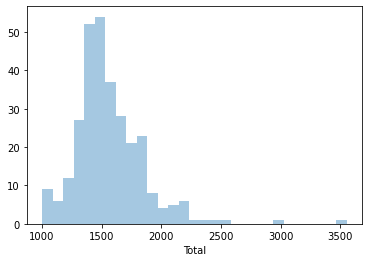

In [29]:
_ = sns.distplot(db['Total'], kde=False)

Note we are using `sns` instead of `pd`, as the function belongs to `seaborn` instead of `pandas`.

We can quickly see most of the areas contain somewhere between 1,200 and 1,700 people, approx. However, there are a few areas that have many more, even up to 3,500 people.

An additional feature to visualize the density of values is called `rug`, and adds a little tick for each value on the horizontal axis:

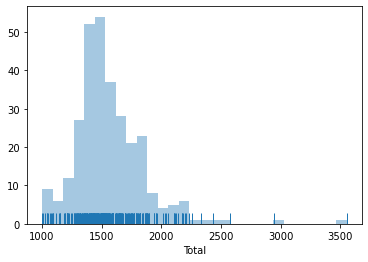

In [30]:
_ = sns.distplot(db['Total'], kde=False, rug=True)

* Kernel Density Plots

Histograms are useful, but they are artificial in the sense that a continuous variable is made discrete by turning the values into discrete groups. An alternative is kernel density estimation (KDE), which produces an empirical density function:

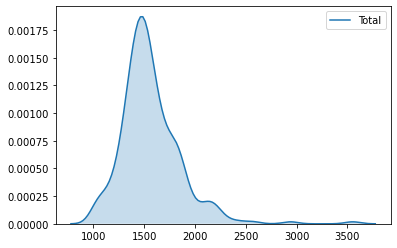

In [31]:
_ = sns.kdeplot(db['Total'], shade=True)

* Line and bar plots

Another very common way of visually displaying a variable is with a line or a bar chart. For example, if we want to generate a line plot of the (sorted) total population by area:

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


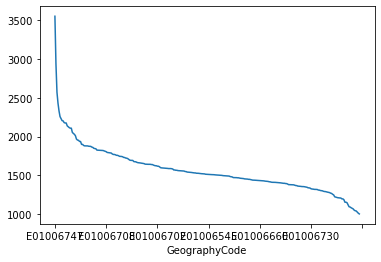

In [32]:
_ = db['Total'].sort_values(ascending=False).plot()

For a bar plot all we need to do is to change from `plot` to `plot.bar`. Since there are many neighbourhoods, let us plot only the ten largest ones (which we can retrieve with `head`):

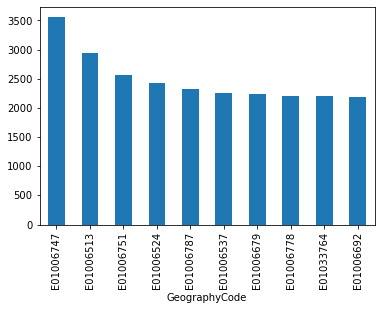

In [33]:
_ = db['Total'].sort_values(ascending=False)\
               .head(10)\
               .plot.bar()

We can turn the plot around by displaying the bars horizontally (see how it's just changing `bar` for `barh`). Let's display now the top 50 areas and, to make it more readable, let us expand the plot's height:

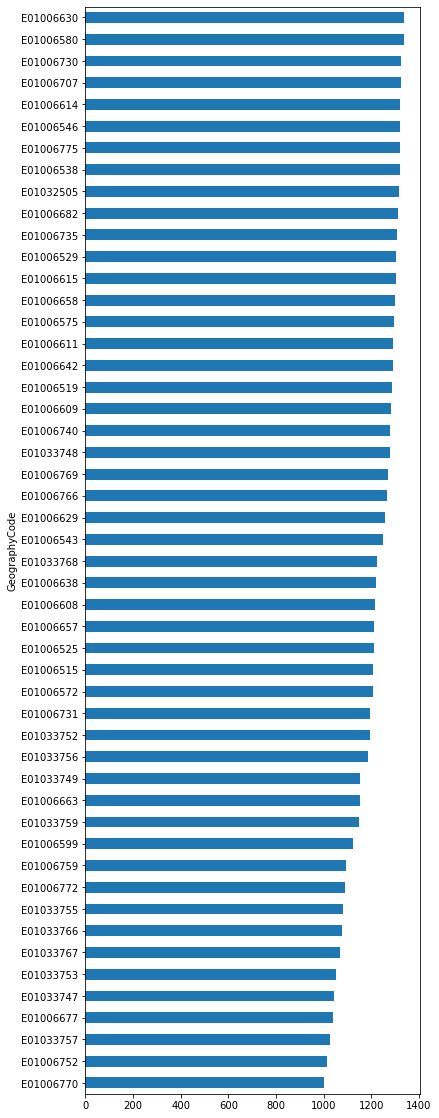

In [34]:
_ = db['Total'].sort_values()\
               .head(50)\
               .plot.barh(figsize=(6, 20))

## Un/tidy data

```{warning}
This section is a bit more advanced and hence considered optional. Fell free to skip it, move to the next, and return later when you feel more confident.
```

> *Happy families are all alike; every
unhappy family is unhappy in its own
way.*  
> Leo Tolstoy.

Once you can read your data in, explore specific cases, and have a first visual approach to the entire set, the next step can be preparing it for more sophisticated analysis. Maybe you are thinking of modeling it through regression, or on creating subgroups in the dataset with particular characteristics, or maybe you simply need to present summary measures that relate to a slightly different arrangement of the data than you have been presented with.

For all these cases, you first need what statistician, and general R wizard, Hadley Wickham calls *"tidy data"*. The general idea to "tidy" your data is to convert them from whatever structure they were handed in to you into one that allows convenient and standardized manipulation, and that supports directly inputting the data into what he calls "*tidy*" analysis tools. But, at a more practical level, what is exactly *"tidy data"*? In Wickham's own words:

> *Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is
messy or tidy depending on how rows, columns and tables are matched up with observations,
variables and types.*

He then goes on to list the three fundamental characteristics of *"tidy data"*:

1. Each variable forms a column.
1. Each observation forms a row.
1. Each type of observational unit forms a table.

If you are further interested in the concept of *"tidy data"*, I recommend you check out the [original paper](http://www.jstatsoft.org/v59/i10/) (open access) and the [public repository](https://github.com/hadley/tidy-data) associated with it.

Let us bring in the concept of "*tidy data*" to our own Liverpool dataset. First, remember its structure:

In [35]:
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880
E01006513,2225,61,595,53,7,2941
E01006514,1786,63,193,61,5,2108
E01006515,974,29,185,18,2,1208
E01006518,1531,69,73,19,4,1696


Thinking through *tidy* lenses, this is not a tidy dataset. It is not so for each of the three conditions:

* Starting by the last one (*each type of observational unit forms a table*), this dataset actually contains not one but two observational units: the different areas of Liverpool, captured by `GeographyCode`; *and* subgroups of an area. To *tidy* up this aspect, we can create two different tables:

In [36]:
# Assign column `Total` into its own as a single-column table
db_totals = db[['Total']]
db_totals.head()

,Total
GeographyCode,
E01006512,1880
E01006513,2941
E01006514,2108
E01006515,1208
E01006518,1696


In [37]:
# Create a table `db_subgroups` that contains every column in `db` without `Total`
db_subgroups = db.drop('Total', axis=1)
db_subgroups.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01006512,910,106,840,24,0
E01006513,2225,61,595,53,7
E01006514,1786,63,193,61,5
E01006515,974,29,185,18,2
E01006518,1531,69,73,19,4


Note we use `drop` to exclude "Total", but we could also use a list with the names of all the columns to keep. Additionally, notice how, in this case, the use of `drop` (which leaves `db` untouched) is preferred to that of `del` (which permanently removes the column from `db`).

At this point, the table `db_totals` is tidy: every row is an observation, every table is a variable, and there is only one observational unit in the table.

The other table (`db_subgroups`), however, is not entirely tidied up yet: there is only one observational unit in the table, true; but every row is not an observation, and there are variable values as the names of columns (in other words, every column is not a variable). To obtain a fully tidy version of the table, we need to re-arrange it in a way that every row is a population subgroup in an area, and there are three variables: `GeographyCode`, population subgroup, and population count (or frequency). 

Because this is actually a fairly common pattern, there is a direct way to solve it in `pandas`:

In [38]:
tidy_subgroups = db_subgroups.stack()
tidy_subgroups.head()

GeographyCode                                
E01006512      Europe                            910
               Africa                            106
               Middle East and Asia              840
               The Americas and the Caribbean     24
               Antarctica and Oceania              0
dtype: int64

The method `stack`, well, "stacks" the different columns into rows. This fixes our "tidiness" problems but the type of object that is returning is not a `DataFrame`:

In [39]:
type(tidy_subgroups)

pandas.core.series.Series

It is a `Series`, which really is like a `DataFrame`, but with only one column. The additional information (`GeographyCode` and population group) are stored in what is called an multi-index. We will skip these for now, so we would really just want to get a `DataFrame` as we know it out of the `Series`. This is also one line of code away:

In [40]:
# Unfold the multi-index into different, new columns
tidy_subgroupsDF = tidy_subgroups.reset_index()
tidy_subgroupsDF.head()

,GeographyCode,level_1,0
0,E01006512,Europe,910
1,E01006512,Africa,106
2,E01006512,Middle East and Asia,840
3,E01006512,The Americas and the Caribbean,24
4,E01006512,Antarctica and Oceania,0


To which we can apply to renaming to make it look better:

In [41]:
tidy_subgroupsDF = tidy_subgroupsDF.rename(columns={'level_1': 'Subgroup', 0: 'Freq'})
tidy_subgroupsDF.head()

,GeographyCode,Subgroup,Freq
0,E01006512,Europe,910
1,E01006512,Africa,106
2,E01006512,Middle East and Asia,840
3,E01006512,The Americas and the Caribbean,24
4,E01006512,Antarctica and Oceania,0


Now our table is fully tidied up!

### Grouping, transforming, aggregating

One of the advantage of tidy datasets is they allow to perform advanced transformations in a more direct way. One of the most common ones is what is called "group-by" operations. Originated in the world of databases, these operations allow you to group observations in a table by one of its labels, index, or category, and apply operations on the data group by group. 

For example, given our tidy table with population subgroups, we might want to compute the total sum of population by each group. This task can be split into two different ones:

* Group the table in each of the different subgroups.
* Compute the sum of `Freq` for each of them.

To do this in `pandas`, meet one of its workhorses, and also one of the reasons why the library has become so popular: the `groupby` operator.

In [42]:
pop_grouped = tidy_subgroupsDF.groupby('Subgroup')
pop_grouped

The object `pop_grouped` still hasn't computed anything, it is only a convenient way of specifying the grouping. But this allows us then to perform a multitude of operations on it. For our example, the sum is calculated as follows:

In [43]:
pop_grouped.sum()

,Freq
Subgroup,
Africa,8886
Antarctica and Oceania,581
Europe,435790
Middle East and Asia,18747
The Americas and the Caribbean,2410


Similarly, you can also obtain a summary of each group:

In [44]:
pop_grouped.describe()

Freq                                  \
                                count         mean         std    min   
Subgroup                                                                
Africa                          298.0    29.818792   51.606065    0.0   
Antarctica and Oceania          298.0     1.949664    2.168216    0.0   
Europe                          298.0  1462.382550  248.673290  731.0   
Middle East and Asia            298.0    62.909396  102.519614    1.0   
The Americas and the Caribbean  298.0     8.087248    9.397638    0.0   

                                                                  
                                    25%     50%      75%     max  
Subgroup                                                          
Africa                             7.00    14.0    30.00   484.0  
Antarctica and Oceania             0.00     1.0     3.00    11.0  
Europe                          1331.25  1446.0  1579.75  2551.0  
Middle East and Asia              16.00    33.5    62.75   840.0  
The Americas and the Caribbean     2.00     5.0    10.00    61.0

We will not get into it today as it goes beyond the basics we want to conver, but keep in mind that `groupby` allows you to not only call generic functions (like `sum` or `describe`), but also your own functions. This opens the door for virtually any kind of transformation and aggregation possible.

## Additional lab materials

The following provide a good "next step" from some of the concepts and tools covered in the [lab](lab_B) and [DIY](diy_B) sections of this block:

* This [NY Times article](http://www.nytimes.com/2014/08/18/technology/for-big-data-scientists-hurdle-to-insights-is-janitor-work.html?_r=0) does a good job at conveying the relevance of data "cleaning" and {ref}`munging <lab_A-data_munging>`.
* A good introduction to data manipulation in Python is Wes McKinney's "Python for Data Analysis" {cite}`mckinney2012python`.
* To explore further some of the visualization capabilities in at your fingertips, the Python library `seaborn` is an excellent choice. Its online [tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial.html) is a fantastic place to start.
* A good extension is Hadley Wickham' "Tidy data" paper {cite}`Wickham:2014:JSSOBK:v59i10`, which presents a very popular way of organising tabular data for efficient manipulation.